<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/CNN_Model_Age%2C_Gender%2C_Ethnicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

2.4.1


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hargurjeet","key":"c3882bdbb49388021171402c7018655e"}'}

In [ ]:
! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv'
od.download('https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv')

  0%|          | 0.00/63.2M [00:00<?, ?B/s]

100%|██████████| 63.2M/63.2M [00:03<00:00, 18.4MB/s]


In [ ]:
df = pd.read_csv('/content/age-gender-and-ethnicity-face-data-csv/age_gender.csv')

df.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [ ]:
df[df.isnull().any(axis=1)]

,age,ethnicity,gender,img_name,pixels


In [ ]:
df.shape

(23705, 5)

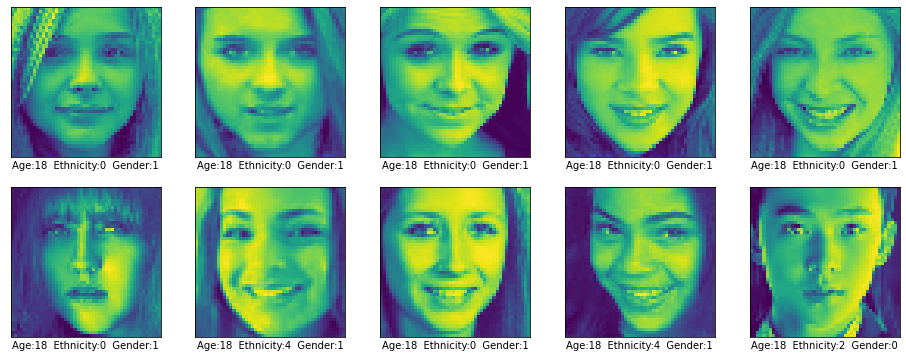

In [ ]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

plt.figure(figsize=(16,16))
for i in range(2500,2510):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

In [ ]:
df.drop('img_name', axis = 1, inplace=True)

In [ ]:
X = df.pixels
y_gender = df.gender
y_age = df.age
y_ethnicity = df.ethnicity

In [ ]:
X = np.stack(np.array(X), axis=0)

In [ ]:
pictures = np.reshape(X, (-1, 48, 48, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(pictures, y_gender, test_size=0.2, random_state=1)

X_train_gender, X_val_gender, y_train_gender, y_val_gender = train_test_split(X_train_gender, y_train_gender, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(pictures, y_age, test_size=0.2, random_state=1)

X_train_age, X_val_age, y_train_age, y_val_age = train_test_split(X_train_age, y_train_age, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2



X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(pictures, y_ethnicity, test_size=0.2, random_state=1)

X_train_ethnicity, X_val_ethnicity, y_train_ethnicity, y_val_ethnicity = train_test_split(X_train_ethnicity, y_train_ethnicity, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
# Model for Gender

gender_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
 train_generator = train_datagen.flow(
        X_train_gender, y_train_gender, # This is the source directory for training images
        batch_size=128)
 
 validation_generator = train_datagen.flow(
        X_val_gender, y_val_gender,
        batch_size=64)

In [ ]:
history = gender_model.fit(
      train_generator,
      steps_per_epoch=len(X_train_gender)/ 128,  
      epochs=15,
      validation_data=validation_generator,  
      verbose=2)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
111/111 - 39s - loss: 0.6460 - accuracy: 0.6225 - val_loss: 0.6278 - val_accuracy: 0.6482
Epoch 2/15
111/111 - 6s - loss: 0.6099 - accuracy: 0.6700 - val_loss: 0.6162 - val_accuracy: 0.6600
Epoch 3/15
111/111 - 6s - loss: 0.6062 - accuracy: 0.6740 - val_loss: 0.6055 - val_accuracy: 0.6802
Epoch 4/15
111/111 - 6s - loss: 0.5974 - accuracy: 0.6787 - val_loss: 0.5994 - val_accuracy: 0.6758
Epoch 5/15
111/111 - 6s - loss: 0.5809 - accuracy: 0.6980 - val_loss: 0.5860 - val_accuracy: 0.6834
Epoch 6/15
111/111 - 6s - loss: 0.5740 - accuracy: 0.7001 - val_loss: 0.5852 - val_accuracy: 0.6982
Epoch 7/15
111/111 - 6s - loss: 0.5591 - accuracy: 0.7129 - val_loss: 0.5625 - val_accuracy: 0.7136
Epoch 8/15
111/111 - 6s - loss: 0.5488 - accuracy: 0.7245 - val_loss: 0.5563 - val_accuracy: 0.7131
Epoch 9/15
111/111 - 6s - loss: 0.5325 - accuracy: 0.7342 - val_loss: 0.5408 - val_accuracy: 0.7311
Epoch 10/15
111/111 - 6s - loss: 0.5189 - accuracy: 0.7420 - val_loss: 0.5222 - val_accuracy: 0.736

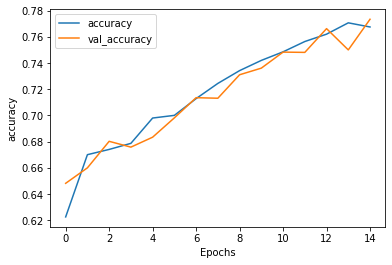

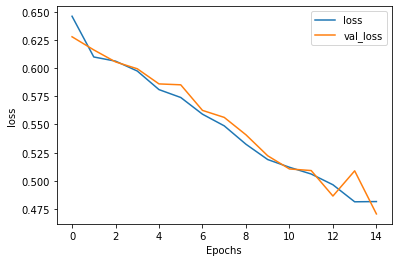

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
gender_model.evaluate(X_test_gender, y_test_gender)

149/149 [==============================] - 1s 4ms/step - loss: 29.4097 - accuracy: 0.7880


[29.40966033935547, 0.7880194187164307]

## Model for predicting ethnicity

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    brightness_range=[0.8,1.2],
    zoom_range=0.2,
    shear_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Model for Ethnicity

ethnicity_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(8, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax'),
])
ethnicity_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ethnicity_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 2, 2, 64)         

In [ ]:
train_generator = train_datagen.flow(
        X_train_ethnicity, y_train_ethnicity, 
        batch_size=128)
 
validation_generator = train_datagen.flow(
        X_val_ethnicity, y_val_ethnicity,
        batch_size=64)
 
history = ethnicity_model.fit(
      train_generator,
      steps_per_epoch=len(X_train_ethnicity)/128,  
      epochs=15,
      validation_data=validation_generator,  
      verbose=2)

Epoch 1/15
111/111 - 10s - loss: 1.4495 - accuracy: 0.4302 - val_loss: 1.3862 - val_accuracy: 0.4699
Epoch 2/15
111/111 - 9s - loss: 1.3998 - accuracy: 0.4557 - val_loss: 1.3915 - val_accuracy: 0.4446
Epoch 3/15
111/111 - 9s - loss: 1.3750 - accuracy: 0.4633 - val_loss: 1.3223 - val_accuracy: 0.4769
Epoch 4/15
111/111 - 10s - loss: 1.3269 - accuracy: 0.4749 - val_loss: 1.2498 - val_accuracy: 0.5060
Epoch 5/15
111/111 - 9s - loss: 1.2767 - accuracy: 0.5000 - val_loss: 1.2104 - val_accuracy: 0.5189
Epoch 6/15
111/111 - 9s - loss: 1.2149 - accuracy: 0.5267 - val_loss: 1.2006 - val_accuracy: 0.5311
Epoch 7/15
111/111 - 9s - loss: 1.1581 - accuracy: 0.5545 - val_loss: 1.1588 - val_accuracy: 0.5697
Epoch 8/15
111/111 - 10s - loss: 1.1241 - accuracy: 0.5736 - val_loss: 1.0950 - val_accuracy: 0.5841
Epoch 9/15
111/111 - 9s - loss: 1.0838 - accuracy: 0.5908 - val_loss: 1.0027 - val_accuracy: 0.6210
Epoch 10/15
111/111 - 9s - loss: 1.0566 - accuracy: 0.6028 - val_loss: 1.0968 - val_accuracy: 0.5

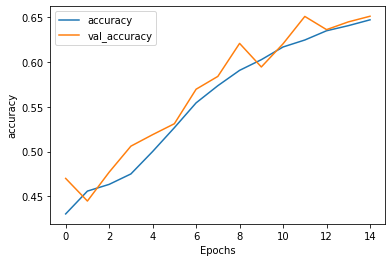

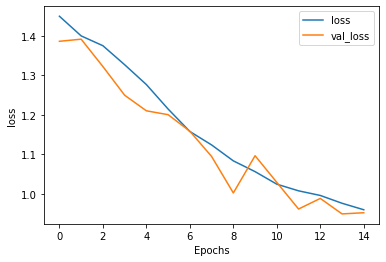

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
ethnicity_model.evaluate(X_test_ethnicity, y_test_ethnicity)

149/149 [==============================] - 1s 4ms/step - loss: 31.4827 - accuracy: 0.6610


[31.482650756835938, 0.6610419750213623]

Predicting the Age

In [ ]:
# Model for Age

age_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1),
])
age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

age_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)             

In [ ]:
age_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(160, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

from tensorflow.keras.optimizers import Adam

age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

age_model.summary()

In [ ]:
history = age_model.fit(
      X_train_age, y_train_age, 
      epochs=7,
      validation_split=0.2,
      batch_size=64)

Epoch 1/7
178/178 [==============================] - 2s 13ms/step - loss: 99.9609 - accuracy: 0.0375 - val_loss: 295.3904 - val_accuracy: 0.0446
Epoch 2/7
178/178 [==============================] - 2s 13ms/step - loss: 96.9354 - accuracy: 0.0399 - val_loss: 244.9022 - val_accuracy: 0.0517
Epoch 3/7
178/178 [==============================] - 2s 13ms/step - loss: 93.1598 - accuracy: 0.0401 - val_loss: 103.0210 - val_accuracy: 0.0373
Epoch 4/7
178/178 [==============================] - 2s 13ms/step - loss: 94.7572 - accuracy: 0.0393 - val_loss: 104.3681 - val_accuracy: 0.0520
Epoch 5/7
178/178 [==============================] - 2s 13ms/step - loss: 93.2517 - accuracy: 0.0399 - val_loss: 145.1055 - val_accuracy: 0.0478
Epoch 6/7
178/178 [==============================] - 2s 13ms/step - loss: 93.3527 - accuracy: 0.0400 - val_loss: 107.8926 - val_accuracy: 0.0499
Epoch 7/7
178/178 [==============================] - 2s 13ms/step - loss: 92.6596 - accuracy: 0.0405 - val_loss: 206.8189 - val_ac

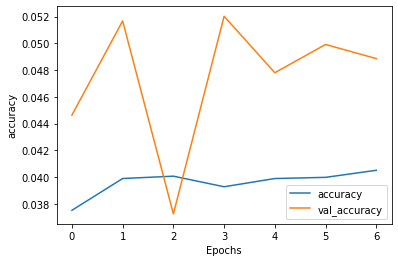

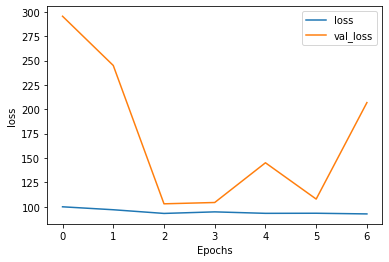

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
age_model.evaluate(X_test_age, y_test_age)

149/149 [==============================] - 1s 5ms/step - loss: 201.3310 - accuracy: 0.0475


[201.3309783935547, 0.04745834320783615]

In [ ]:
print ('Actual Values:', y_test_age[:10])
print()
y_age_pred = age_model.predict(X_test_age[:10])
print ('Predicted Values:', y_age_pred)

Actual Values: 10851    30
966       1
14158    36
8576     27
21066    63
11590    31
7377     26
4339     23
3016      2
11439    30
Name: age, dtype: int64

Predicted Values: [[17.742966 ]
 [ 2.2925582]
 [25.45819  ]
 [21.986536 ]
 [52.710274 ]
 [27.60915  ]
 [25.074863 ]
 [19.304447 ]
 [ 3.590486 ]
 [22.374283 ]]


In [ ]:
!pip install jovian -q --upgrade
import jovian

jovian.commit()

     |████████████████████████████████| 71kB 3.1MB/s 
[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
